#### **sigmoidal.ai**

### **Data Science na Prática 2.0**

# <center>**Analisando a criminalidade do Rio de Janeiro**

<center><img alt="Rio de Janeiro" width="40%" src="https://user-images.githubusercontent.com/45701541/87468069-514bd000-c5ef-11ea-8b51-b9c1c3a6dc06.png">




Independente se você é uma pessoa que assiste ou não aos telejornais, é provável que esteja consciente de que o Brasil, infelizmente, é um país com altos índices de criminalidade. No estado do Rio de Janeiro os dados nos mostram que essa realidade pode ser ainda pior se comparado à média nacional.

Hoje é possível consultar essas informações em sites oficiais do estado, pois estão disponibilizadas na Intenret. O governo do Rio de Janeiro por exemplo traz a iniciativa do [portal ISPDados](http://www.ispdados.rj.gov.br/) com essas informações.

No projeto deste Módulo, faremos uma análise acerca dos indicadores estatísticos da violência no Rio, explorando algumas das variáveis fornecidas.







## <center>**O estado do Rio de Janeiro**

<center><img alt="Rio de Janeiro" width="40%" src="https://user-images.githubusercontent.com/45701541/87586254-a69ee480-c6b6-11ea-931e-41575d6334ed.png">

  O estado do Rio de Janeiro é terceiro menor estado brasileiro, concentra 8,4% da população do país, sendo o estado com maior densidade demográfica do Brasil. Segundo dados do Censo 2010, o estado é o terceiro mais populoso do Brasil. A estimativa populacional calculada pelo IBGE, tendo como referência 1.º de julho de 2017, foi de mais de 16 milhões de habitantes.
  O produto interno bruto (PIB) do estado é o segundo maior do país, enquanto o Índice de Desenvolvimento Humano (IDH) fluminense é o quarto mais elevado do Brasil. O estado possui a segunda maior cidade do país, a capital de mesmo nome do estado, Rio de Janeiro. A primeira é São Paulo/SP.






## **Obtenção dos Dados**


Os dados foram obtidos diretamento do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

No caso do *dataset* a ser utilizado aqui, o arquivo `csv` pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).

In [2]:
# importa os pacotes necessários
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')



Antes de começarmos a explorar nosso dataset, é preciso saber com o que estamos lidando. Para começarmos a entender melhor esse aspecto, vamos verificar as dimensões do dataset.

Primeiramente, vamos obter uma imagem de como é o nosso dataset. Antes de analisarmos suas estatítiscas, retiraremos informações sobre nosso conjunto de dados em questão, por exemplo: número de entradas e saídas, tipos de variáveis, nome e quantidade de colunas, etc.


---



In [3]:
df.shape
print("Variáveis: ", df.shape[1])
print("Entradas: ", df.shape[0]) 

Variáveis:  56
Entradas:  344


In [4]:
print("Colunas: ", df.columns);

Colunas:  Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
 

Uma rápida leitura dos dados mostrados acima nos revelam o que esperar deste dataset e nos indica forma de trabalha-lo mais a frente. Vemos que algumas de suas variáveis são categorias de: homicídios, roubo, crimes relacionados às drogas, entre outros.



In [5]:
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Vemos aqui nessa ultima célula que todas as entradas desse dataset são numéricas, sendo `float64` ou `int64`.

In [ ]:
df.head(12)

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3
5,1991,6,647,NaN,14,NaN,201,2977,NaN,NaN,NaN,518,178,1354,82,831,342,37,NaN,NaN,NaN,NaN,NaN,81,3423,1992,673,NaN,NaN,NaN,3519,6184,NaN,NaN,NaN,NaN,157,NaN,NaN,NaN,802,NaN,NaN,NaN,NaN,NaN,NaN,111,NaN,NaN,NaN,661,1173,1354,NaN,3
6,1991,7,558,NaN,14,NaN,201,2784,NaN,NaN,NaN,496,186,1365,82,797,308,25,NaN,NaN,NaN,NaN,NaN,94,3353,1978,700,NaN,NaN,NaN,3604,6282,NaN,NaN,NaN,NaN,203,NaN,NaN,NaN,870,NaN,NaN,NaN,NaN,NaN,NaN,126,NaN,NaN,NaN,572,1105,1365,NaN,3
7,1991,8,557,NaN,11,NaN,209,3134,NaN,NaN,NaN,498,189,1347,71,813,299,29,NaN,NaN,NaN,NaN,NaN,88,3334,1835,794,NaN,NaN,NaN,3641,6270,NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,809,NaN,NaN,NaN,NaN,NaN,NaN,79,NaN,NaN,NaN,568,1112,1347,NaN,3
8,1991,9,542,NaN,19,NaN,146,3026,NaN,NaN,NaN,473,199,1353,91,805,281,12,NaN,NaN,NaN,NaN,NaN,90,3304,1993,810,NaN,NaN,NaN,3460,6263,NaN,NaN,NaN,NaN,179,NaN,NaN,NaN,756,NaN,NaN,NaN,NaN,NaN,NaN,71,NaN,NaN,NaN,561,1086,1353,NaN,3
9,1991,10,613,NaN,21,NaN,200,3482,NaN,NaN,NaN,561,228,1470,83,834,328,16,NaN,NaN,NaN,NaN,NaN,107,3627,1999,862,NaN,NaN,NaN,3621,6482,NaN,NaN,NaN,NaN,184,NaN,NaN,NaN,818,NaN,NaN,NaN,NaN,NaN,NaN,95,NaN,NaN,NaN,634,1162,1470,NaN,3


In [ ]:
df.tail(12)

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
332,2018,9,382,7.0,14,108.0,509,5344,489.0,157.0,2504.0,463,103,4053,578,6756,1275,1,1.0,2182.0,9.0,160.0,16.0,2385,17982,1339,1419,655.0,1173.0,161.0,6686,11433,0.0,146.0,5.0,2809.0,1959,747.0,1062.0,183.0,2625,2798.0,470.0,1633.0,190.0,4666.0,386.0,17,1.0,4.0,0.0,511,10213,4053,62376.0,3
333,2018,10,383,2.0,11,127.0,491,5472,488.0,153.0,2382.0,454,95,4242,651,7360,1441,1,8.0,2477.0,9.0,83.0,18.0,2308,19147,1428,1597,735.0,1368.0,206.0,7036,12370,0.0,143.0,8.0,2959.0,1735,666.0,939.0,165.0,3176,2727.0,515.0,1105.0,171.0,4877.0,427.0,16,2.0,1.0,1.0,523,11278,4242,65589.0,3
334,2018,11,378,3.0,12,136.0,463,5277,424.0,153.0,2283.0,441,84,4074,725,7017,1384,5,3.0,2346.0,6.0,79.0,16.0,2363,18543,1325,1560,737.0,1357.0,176.0,6963,12118,1.0,121.0,4.0,2879.0,1716,664.0,931.0,160.0,2848,2754.0,489.0,1233.0,259.0,4657.0,410.0,24,2.0,1.0,0.0,529,10747,4074,63281.0,3
335,2018,12,346,5.0,13,88.0,447,5737,430.0,191.0,2590.0,434,108,3812,788,6459,1183,1,4.0,2144.0,16.0,73.0,13.0,2168,17203,1353,1772,620.0,1377.0,168.0,6893,12183,1.0,123.0,7.0,2696.0,1585,640.0,815.0,165.0,2502,2471.0,490.0,1147.0,217.0,4835.0,422.0,24,3.0,1.0,0.0,452,9786,3812,62043.0,3
336,2019,1,386,2.0,15,159.0,577,6423,459.0,157.0,2334.0,431,116,3785,740,7454,1328,2,7.0,2414.0,6.0,88.0,19.0,2365,18755,1415,2058,720.0,1581.0,168.0,7992,13934,0.0,129.0,6.0,3125.0,2021,792.0,1077.0,201.0,2810,2915.0,540.0,1266.0,236.0,5902.0,447.0,31,4.0,2.0,0.0,562,11196,3785,69609.0,3
337,2019,2,323,5.0,8,145.0,450,5210,440.0,157.0,2045.0,411,116,3554,645,7000,1356,4,1.0,2111.0,14.0,60.0,14.0,2124,17410,1344,1889,685.0,1613.0,158.0,7315,13004,0.0,144.0,7.0,3089.0,2090,798.0,1126.0,202.0,2556,3072.0,559.0,1392.0,235.0,4904.0,351.0,37,4.0,4.0,0.0,481,10467,3554,64967.0,3
338,2019,3,344,5.0,11,132.0,590,5902,469.0,160.0,2157.0,497,95,3775,638,7734,1532,1,4.0,2626.0,5.0,88.0,16.0,2547,19558,1364,2757,634.0,1889.0,202.0,8549,15395,0.0,159.0,6.0,3004.0,1941,740.0,1053.0,181.0,2470,3026.0,618.0,1392.0,306.0,5571.0,407.0,29,2.0,2.0,0.0,492,11892,3775,72100.0,3
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3


Nas últimas duas células, utilizamos os comandos `head(12)` e `tail(12)`, os quais nos mostram, respectivamente, as 12 primeiras e as 12 últimas entradas do dataset. Com isso podemos concluir que nosso dataset engloba dados que se iniciam no primeiro mês de 1991(Janeiro) e vai até o 8˚ mês de 2019(Agosto).

Outra coisa a se notar, é que podemos perceber que há muitos dados faltantes no dataset. Na célula onde utilizamos o método `head()` há muitos números ausentes, ntretanto, com o comando `tail()`, que serve para mostrar as últimas entradas do dataset, as 12 últimas nesse caso, não encontramos nenhum valor faltando. 

Podemos traçar algumas hipóteses quanto a isso. 

* A primeira é de que algumas variáveis não eram consideradas em 1991, e só foram adicionadas ao catálogo após um tempo, sendo portanto devido a uma mudança de protocolo. 

* Em segundo, pode ser devido a melhorias nas tecnologias utilizadas ou no preparo dos profissionais que fizeram as coletas. 

* Em terceiro, obviamente, há também o fator humano, onde o erro de medição e coleta foi responsável por campos que ficaram em branco. 








In [6]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

  O resultado acima nos mostra que variáveis como roubo de biciclete e apreensão de drogas sem autor, possuem respectivamente mais de 80% e 50%
de valores nulos. 

  Contudo, as variáveis 'homicidio doloso', 'roubo de veículo' e muitas outras, não possuem valores ausentes.




### <center>**Análise Estatística: O retrato da violência no RJ**

<center><img alt="Rio de Janeiro" width="40%" src="https://user-images.githubusercontent.com/45701541/87477807-1f426a00-c5ff-11ea-9c15-403ea333e67d.png"></center>



Nesta parte começaremos a análise estatística do nosso _dataset_. Utilizaremos o método `describe()` para nos informar acerca da distribuição dos dados e para identificarmos a presença de **outliers** em nosso conjunto de dados.

_Outliers_ são valores que divergem em demasia do restante dos dados, e que podem nos levar a erros na interpretação do dataset. Uma das causas da existência de outliers podem ser erros de medição ou aquisição dos dados. 



In [7]:
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

## **Categorias**
Dividiremos nossa análise em duas partes: (1) Crimes contra o patrimônio, e (2) Crimes contra a vida


### **(1)Crimes Contra o Patrimônio - Veículos**

Vamos dedicar essa seção do projeto para investigar dados em relação aos crimes de `roubo e furto de veículos`.

Problema comum nas grandes metrópoles brasileiras, esse tipo de crime merece destaque em nosso projeto.

In [8]:
#  Média da variável roubo_veiculo
print(round(df.roubo_veiculo.mean(),2)) 


2448.7


Este resultado nos mostra que a média da variável *roubo de veículos* é de 2448.7 veículos por mês.



In [9]:
# ver a média da variável furto_veiculos
mean_furto_veiculos = df.furto_veiculos.mean()
print(round(mean_furto_veiculos,2)) 

1674.67


Foram registrados, em média, 1674.67 furtos de veículos por mês.

In [10]:
mean_recuperacao_veiculos = df.recuperacao_veiculos.mean()

# total de veículos perdidos
total = mean_roubo_veiculo + mean_furto_veiculos


print('Média de Veículos Perdidos por Mês: {:.2f} '.format(total))
print('Veículos Recuperados por Mês: {:.2f}'.format(mean_recuperacao_veiculos))



# porcentagem de veículos recuperados
pct = mean_recuperacao_veiculos/total*100

print('{:.2f}% dos veículos roubados ou furtados são recuperados.'.format(pct))

NameError: ignored

### **(2) Crimes Contra a Vida**

Abaixo, vamos identificar qual foi o máximo e mínimo registrado para a variável `hom_doloso` ao longo do período observado no dataset.





In [11]:
# valores max e min de hom_doloso
max_hom_doloso = df.hom_doloso.max()
min_hom_doloso = df.hom_doloso.min()

# imprimir os valores máximos e mínimos
print("Min:\t{}".format(min_hom_doloso))
print("Max:\t{}".format(max_hom_doloso))

Min:	272
Max:	831


Acima podemos ver que no mês com menor número de casos foram registrados 272 homicídios dolosos. Houve 831 homicídios dolosos no mês com números mais elevados.



In [12]:
# verificando o mês com menor número de homicídios dolosos
df[df.hom_doloso == 272] 

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [13]:
# verificando o mês com maior número de homicídios dolosos
df[df.hom_doloso == 831] 

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


Acima, vemos que o mês de **Janeiro de 1995** foi o mês com mais casos de homicídios dolosos registrados no nosso dataset, enquanto o posto de mês com menor número de casos foi **Junho de 2015**.

Isso sugere que talvez o crime venha diminuindo, contudo para podermos afirmar isso seria necessária uma análise mais aprofundada. 


## **Visualização de Dados**

Histogramas são poderosas ferramentas de visualização, que nos auxiliam a entender a distribuição dos valores em uma variável.

Abaixo, faremos essa análise em relação à variável `hom_doloso`.



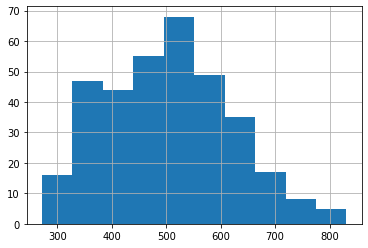

In [16]:
# plotar histograma de hom_doloso
df.hom_doloso.hist();

No gráfico acima, alguns dados chamam a nossa atenção, como:

* Houve quase 70 meses com 500-550 homicídios dolosos registrados ao longo do período em estudo.
* Houve menos de 10 meses ao longo de todo o período estudado na casa de 800 registros de homicídio doloso.


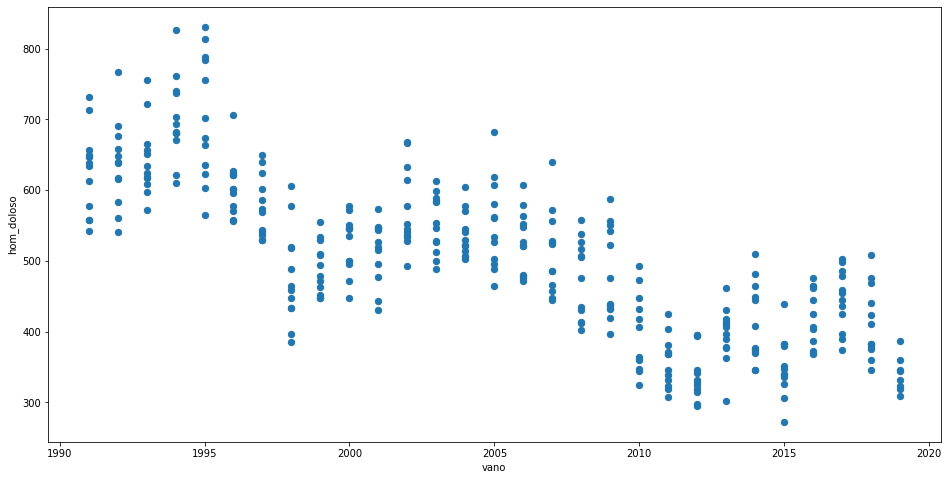

In [19]:
import matplotlib.pyplot as plt

# plotar o scatterplot
fig, ax = plt.subplots(figsize = (16,8))

# plotar median_income vs. median_house_value
df.plot.scatter(x='vano', y='hom_doloso', ax=ax, s=40)

plt.show()

Utilizando o `scatter plot`, o gráfico de dispersão, vemos uma relação inusitada da quantidade de homicídios dolosos através do tempo. 

Vemos claramente que de 1991 até 1995 houve maior número de ocorrências de homicídio doloso, e que a partir do ano de 2005, houve queda quase que de forma constante. 
Com o gráfico de dispersão podemos quase traçar uma reta(neste caso uma reta descendente) que resume o comportamento dos dados.



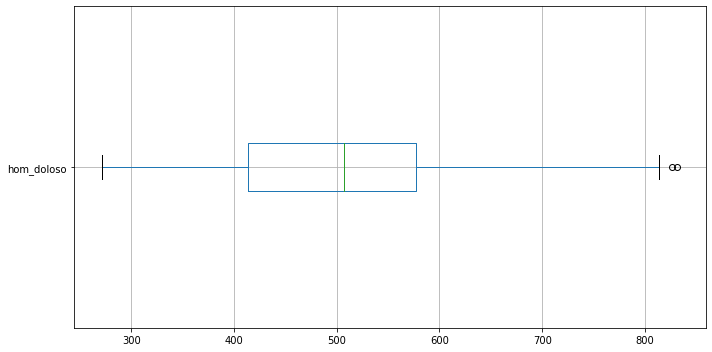

In [20]:
fig, ax = plt.subplots(figsize=(10,5))

df.boxplot(['hom_doloso'], vert=False, ax=ax)

plt.tight_layout()

O grafico de caixa, _boxplot_, nos informa mais detalhes sobre as ocorrências de homidio doloso:
* o valor mínimo, isto é, o mês com menor número de ocorrências conta com menos de 300 casos

* 25% das ocorrências são pouco mais de 400 casos, aproximadamente 410
* 50% das ocorrências são valores próximos a 500
* 75% das ocorrências também são inferiores a 600, algo em torno de 570
* Os valores máximos passam por pouco de 800, mas são outliers.


## **Conclusão**

A principal lição aprendida aqui foi a necessidade de se atentar a cada detalhe do seu dataset quando se está lidando com dados reais, extraídos diretamente de sites e portais com dados abertos.

A etapa de aquisição, tratamento e exploração dos dados é o que mais vai consumir o tempo do seu projeto, por isso é necessário dedicar a devida atenção nessa parte para não comprometer os resultados.

No mais, concluímos o projeto referente ao módulo II do curso "Data Science na pratica" do sigmoidal. Este projeto proporcionou aos alunos uma visão mais clara e objetiva da importância da ciência de dados. Tratando-se de dados oficiais do governo do estado, podemos sugerir, por exemplo, um modelo de políticas publicas, tendo em vista novas diretrizes para as quais os órgãos de segurança devem se focar ou otimizar seus resultados.

Este trabalho contudo, ainda não é profundo o suficiente para tal, mas indica que é possível ser feito e que a ciência de dados é uma ferramenta para interpretação da realidade com base nos dados que são coletados.




## <center> **....** </center>

_Se você se interessou por este projeto, ou quer saber mais sobre Data Science:_
 
 * _me siga no [Github](https://github.com/rfernand3s) para os trabalhos mais técnicos_
 
 * _conecte-se ao meu [LinkedIn](https://www.linkedin.com/in/rodrigo-fernandes-72b9aa100/) lá eu também comento e escrevo artigos_

_Produzo conteudo sobre tecnologia nas duas plataformas, esta esperando o quê?_

